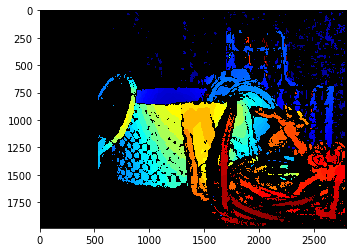

In [2]:
import numpy
import cv2

from matplotlib import pyplot as plt
from matplotlib import cm

left  = cv2.imread("D:\\Cable-perfect\\Cable-perfect\\im0.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread("D:\\Cable-perfect\\Cable-perfect\\im1.png", cv2.IMREAD_GRAYSCALE)


fx = 479.489        # lense focal length
baseline = 171.548  # distance in mm between the two cameras
disparities = 512 # num of disparities to consider
block = 31        # block size to match
units = 0.512     # depth units, adjusted for the output to fit in one byte

sbm = cv2.StereoBM_create(numDisparities=disparities,
                          blockSize=block)

# calculate disparities
disparity = sbm.compute(left, right)
valid_pixels = disparity > 0

# calculate depth data
depth = numpy.zeros(shape=left.shape).astype("uint8")
depth[valid_pixels] = (fx * baseline) / (units * disparity[valid_pixels])

#print(depth)

# visualize depth data
depth = cv2.equalizeHist(depth)
colorized_depth = numpy.zeros((left.shape[0], left.shape[1], 3), dtype="uint8")
temp = cv2.applyColorMap(depth, cv2.COLORMAP_JET)
colorized_depth[valid_pixels] = temp[valid_pixels]
plt.imshow(colorized_depth)
plt.show()